# Semantic Search

Imagine you have a huge library with millions of books. A traditional search engine is like a librarian who only understands exact keywords. If you ask for "recipes with tomatoes," they'll only find books with those exact words in the title or description.

A semantic search engine is like a super-smart librarian who understands the meaning of your request, not just the words. They understand concepts, relationships, and context.

How it Works (Simplified):

1. Understanding Meaning (Semantics):

Instead of just matching keywords, it analyzes the words you use and tries to understand the underlying meaning.

It uses techniques like:

a. Natural Language Processing (NLP): To understand the grammar and structure of your query.

b. Knowledge Graphs: To understand relationships between concepts (e.g., "tomato" is a type of "fruit," used in "Italian cuisine").

c. Word Embeddings: To understand the similarity between words (e.g., "recipe" is similar to "cooking instructions").

2. Finding Relevant Information:

It doesn't just look for pages with your exact words.
It looks for pages that discuss the concepts you're interested in, even if they use different words.

3. Providing Meaningful Results:

a. It tries to give you the most relevant and useful results, not just a list of pages with your keywords.

b. It may even directly answer your question, rather than just providing links.

Detailed Example:

Let's say you search for: "What are the best ways to reduce redness and irritation from sunburn?"

Traditional Search Engine:

It would look for pages with those exact words.

You might get results about:

Sunscreen product descriptions.
Articles with the phrase "redness and irritation."
Pages that mention "sunburn."
It would not understand that sunburn is a skin condition, redness and irritation are symptoms, and you are asking for remedies.

Semantic Search Engine:

It would understand:

"Sunburn" is a skin injury caused by excessive sun exposure.
"Redness and irritation" are common symptoms of sunburn.
"Best ways" implies you're looking for remedies or treatments.
It might use knowledge graphs to find:
Aloe vera is a common remedy for sunburn.
Cold compresses can reduce inflammation.
Moisturizers can soothe irritated skin.
It might use NLP to understand that "reduce" is similar to "relieve" or "treat."

It would provide results like:

Articles about home remedies for sunburn.
Information about over-the-counter sunburn relief products.
Tips for preventing sunburn in the future.
Direct answers, such as "Aloe vera gel and cold compresses help reduce redness and irritation from sunburn."
It could also show related searches like "how to treat peeling sunburn" or "best sunscreen for sensitive skin".
In essence:

A traditional search engine is like a word-matching machine.
A semantic search engine is like a thought-understanding machine. It aims to provide results based on the meaning of your query, making the search experience more intuitive and efficient.

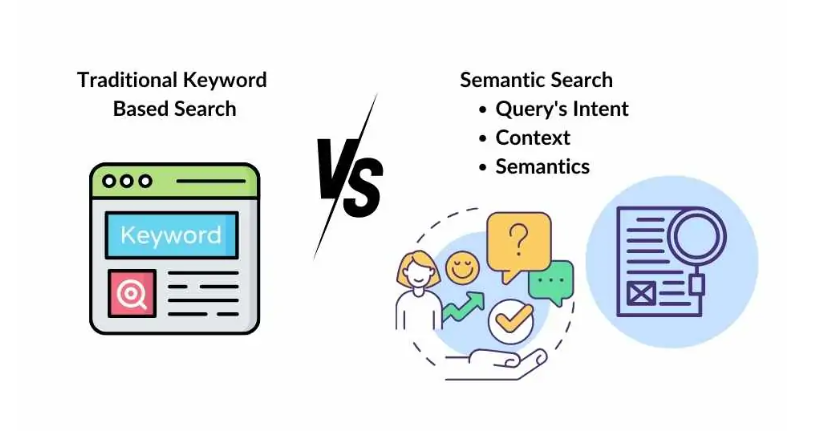



# How to build a Semantic Search Engine ?

# 1. Install necessary dependencies

In [8]:
! pip install langchain-community pypdf

# 2. Enable LangSmith Tracing

Securely prompts the user for their LangSmith API key and then sets up the necessary environment variables to enable LangSmith tracing for LangChain applications.

In [9]:
import getpass
import os

os.environ["LANGSMITH_TRACING"] = "true"
os.environ["LANGSMITH_API_KEY"] = getpass.getpass()

··········


# 3. Loading PDF document using PyPDFLoader

a. from langchain_community.document_loaders import PyPDFLoader:

This line imports the PyPDFLoader class from the langchain_community.document_loaders module.
PyPDFLoader is a LangChain document loader that specifically handles loading text content from PDF files.

b. file_path = "IndianConstitution.pdf":

This line assigns the string "IndianConstitution.pdf" to the variable file_path.
This string represents the path to the PDF file you want to load. Make sure this file exists in the same directory as your Python script or provide the full path to the file.

c. loader = PyPDFLoader(file_path):

This line creates an instance of the PyPDFLoader class, passing the file_path variable as an argument.
This creates a loader object that is configured to load the content from the specified PDF file.

d. docs = loader.load():

This line calls the load() method of the loader object.
The load() method reads the content of the PDF file and returns it as a list of Document objects.
Each Document object typically represents a page of the PDF, containing the page's text content and metadata (like the page number).
The returned list of Document objects is assigned to the variable docs.

e. print(len(docs)):

This line prints the length of the docs list using the len() function.
Since each Document object in the list usually corresponds to a page in the PDF, this line effectively prints the number of pages in the PDF file.

In [10]:
from langchain_community.document_loaders import PyPDFLoader
# List of PDF file paths
pdf_file_paths = [
    "COC.pdf",
    "COK.pdf",
    "CON.pdf",
    "COT.pdf",
    "COV.pdf",
    "CTABLE.pdf",
    "GOT.pdf",
    "THOT.pdf",
    "TOT.pdf",
]

all_docs = []  # Initialize an empty list to store all documents

for file_path in pdf_file_paths:
    try:  # Add a try-except block for error handling
        if os.path.exists(file_path): #check if the file exists before loading
            loader = PyPDFLoader(file_path)
            docs = loader.load()
            all_docs.extend(docs)  # Extend the list with the loaded documents
        else:
            print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

print(f"Total number of documents loaded: {len(all_docs)}")

Total number of documents loaded: 231


In [11]:
all_docs[0].page_content

'Chain of Code: Reasoning with a Language Model-Augmented Code Emulator\nChengshu Li1 Jacky Liang2 Andy Zeng2 Xinyun Chen2 Karol Hausman1 2 Dorsa Sadigh1 2 Sergey Levine2 3\nLi Fei-Fei1 Fei Xia* 2 Brian Ichter* 2\nhttps://chain-of-code.github.io/\nAbstract\nCode provides a general syntactic structure to\nbuild complex programs and perform precise\ncomputations when paired with a code interpreter\n- we hypothesize that language models (LMs) can\nleverage code-writing to improve Chain of Thought\nreasoning not only for logic and arithmetic tasks\n(Chen et al., 2022; Nye et al., 2021; Austin et al.,\n2021), but also forsemanticones (and in particular,\nthose that are a mix of both). For example, consider\nprompting an LM to write code that counts the\nnumber of times it detects sarcasm in an essay:\nthe LM may struggle to write an implementation\nfor “detect_sarcasm(string)” that can\nbe executed by the interpreter (handling the edge\ncases would be insurmountable). However, LMs\nmay stil

In [12]:
all_docs[5].page_content

'Chain of Code: Reasoning with a Language Model-Augmented Code Emulator\nTable 1.Overall performance (%) on BIG-Bench Hard with both few-shot prompting with a single task and cross-task. The delta compared to\ndirect prompting is shown in parenthesis.\ntext-davinci-003 PaLM 2-S* (code variant (Google et al., 2023))\nPrompt Human Direct CoT CoC (Ours) Direct CoT CoC (Ours)\nSingle task 68 55 72 (+17) 84 (+29) 49 61 (+12) 78 (+29)\nCross task - 50 55 (+5) 61 (+11) 45 47 (+2) 47 (+2)\nFigure 4.Average performance across different baselines grouped by task type, indicating the problem type and how CoC is generated & executed.\nAs expected, we see that when the code is repeated and run\nby Python, CoC gets nearly 100%, though these tasks (e.g.,\nmulti-step arithmetic) seem to be among the most challenging\nfor the other baselines, including human raters. The other\ncategories are more challenging for CoC; however in each, we\nstill see a benefit over baselines.\nQuestion 3: Ablations.Figure

# 4. Define the Chunking Strategy

a. from langchain_text_splitters import RecursiveCharacterTextSplitter:

This line imports the RecursiveCharacterTextSplitter class from the langchain_text_splitters module.
This class is designed to split text into smaller chunks while trying to keep semantically related pieces of text together. It recursively splits the text based on different characters (e.g., paragraphs, sentences, words) until the chunks are within the desired size.

b. text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200, add_start_index=True):

This line creates an instance of the RecursiveCharacterTextSplitter class, configuring it with the following parameters:
chunk_size=1000: Specifies the maximum size of each text chunk (in characters).
chunk_overlap=200: Specifies the number of overlapping characters between consecutive chunks. This helps to maintain context between chunks.
add_start_index=True: Adds a start_index metadata field to each chunk, indicating the starting position of the chunk in the original document.

c. all_splits = text_splitter.split_documents(docs):

This line calls the split_documents() method of the text_splitter object, passing the docs list (presumably the list of Document objects loaded from a PDF or other source) as an argument.
The split_documents() method splits the text content of each Document object in the docs list into smaller chunks based on the configured parameters.
The result is a new list of Document objects, where each Document represents a text chunk.
This list of chunked Document objects is assigned to the variable all_splits.

d. len(all_splits):

This line calculates and returns the length of the all_splits list, which represents the total number of text chunks created by the splitter.
This effectively tells you how many smaller pieces of text the original documents were broken into.

Summary :

This code snippet takes a list of LangChain Document objects, splits the text content of those documents into smaller chunks of 1000 characters with a 200-character overlap, and then returns the number of resulting chunks. This is a common step in LangChain pipelines when you want to process large documents by breaking them into smaller, more manageable pieces for LLMs, which often have context window limitations.

In [13]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=200, add_start_index=True
)
all_splits = text_splitter.split_documents(all_docs)

len(all_splits)

1035

In [14]:
all_splits[0].page_content

'Chain of Code: Reasoning with a Language Model-Augmented Code Emulator\nChengshu Li1 Jacky Liang2 Andy Zeng2 Xinyun Chen2 Karol Hausman1 2 Dorsa Sadigh1 2 Sergey Levine2 3\nLi Fei-Fei1 Fei Xia* 2 Brian Ichter* 2\nhttps://chain-of-code.github.io/\nAbstract\nCode provides a general syntactic structure to\nbuild complex programs and perform precise\ncomputations when paired with a code interpreter\n- we hypothesize that language models (LMs) can\nleverage code-writing to improve Chain of Thought\nreasoning not only for logic and arithmetic tasks\n(Chen et al., 2022; Nye et al., 2021; Austin et al.,\n2021), but also forsemanticones (and in particular,\nthose that are a mix of both). For example, consider\nprompting an LM to write code that counts the\nnumber of times it detects sarcasm in an essay:\nthe LM may struggle to write an implementation\nfor “detect_sarcasm(string)” that can\nbe executed by the interpreter (handling the edge\ncases would be insurmountable). However, LMs'

In [15]:
all_docs[0].page_content

'Chain of Code: Reasoning with a Language Model-Augmented Code Emulator\nChengshu Li1 Jacky Liang2 Andy Zeng2 Xinyun Chen2 Karol Hausman1 2 Dorsa Sadigh1 2 Sergey Levine2 3\nLi Fei-Fei1 Fei Xia* 2 Brian Ichter* 2\nhttps://chain-of-code.github.io/\nAbstract\nCode provides a general syntactic structure to\nbuild complex programs and perform precise\ncomputations when paired with a code interpreter\n- we hypothesize that language models (LMs) can\nleverage code-writing to improve Chain of Thought\nreasoning not only for logic and arithmetic tasks\n(Chen et al., 2022; Nye et al., 2021; Austin et al.,\n2021), but also forsemanticones (and in particular,\nthose that are a mix of both). For example, consider\nprompting an LM to write code that counts the\nnumber of times it detects sarcasm in an essay:\nthe LM may struggle to write an implementation\nfor “detect_sarcasm(string)” that can\nbe executed by the interpreter (handling the edge\ncases would be insurmountable). However, LMs\nmay stil

In [16]:
! pip install -qU langchain-openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.0 MB/s eta 0:00:00


# 5. Vector Embedding



This code snippet first checks if the OpenAI API key is already set as an environment variable. If it's not, it prompts the user to enter it securely. Then, it initializes an OpenAIEmbeddings object using the specified embedding model. This setup ensures that the API key is available for LangChain to use when generating embeddings. It's good practice to get the API key from an environment variable, rather than hard coding it into your code, for security reasons.

In [17]:
import getpass
import os

if not os.environ.get("OPENAI_API_KEY"):
  os.environ["OPENAI_API_KEY"] = getpass.getpass("add your key here")

from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

add your key here··········


1. vector_1 = embeddings.embed_query(all_splits[0].page_content):

This line calls the embed_query() method of the embeddings object.
all_splits is assumed to be a list of LangChain Document objects, which were previously created by splitting a larger document (like a PDF) into smaller text chunks.
all_splits[0].page_content accesses the text content of the first chunk in the list.
The embed_query() method takes this text content as input and returns a vector representation (embedding) of the text.
The resulting vector is assigned to the variable vector_1.

2. vector_2 = embeddings.embed_query(all_splits[1].page_content):

This line does the same as the previous line, but it generates an embedding for the second chunk in the all_splits list (all_splits[1].page_content).
The resulting vector is assigned to the variable vector_2.

3. assert len(vector_1) == len(vector_2):

This line uses the assert statement to check if the lengths of vector_1 and vector_2 are equal.
This check is performed to ensure that the embedding model is generating vectors of consistent dimensionality.
If the lengths are not equal, the assert statement will raise an AssertionError, indicating a problem.

4. print(f"Generated vectors of length {len(vector_1)}\n"):

This line prints a formatted string that displays the length of the generated vectors (vector_1 and vector_2, which are the same length).
The \n at the end adds a newline character for better formatting.

5. print(vector_1[:10]):

This line prints the first 10 elements of the vector_1 vector.

Summary

This code snippet takes the text content of the first two chunks from a list of LangChain Document objects, generates embeddings for them using the OpenAIEmbeddings object, checks if the resulting vectors have the same length, prints the length of the vectors, and then prints the first 10 elements of the first vector. This demonstrates how to use the embed_query() method to generate embeddings for text data and provides a basic way to inspect the generated vectors.

In [18]:
vector_1 = embeddings.embed_query(all_splits[0].page_content)
vector_2 = embeddings.embed_query(all_splits[1].page_content)

assert len(vector_1) == len(vector_2)
print(f"Generated vectors of length {len(vector_1)}\n")
print(vector_1[:10])

Generated vectors of length 1536

[0.03304988145828247, 0.019575899466872215, -0.02083294838666916, 0.0011121926363557577, 0.04326339438557625, 0.03595680370926857, -0.007097082212567329, 0.009296915493905544, -0.0427396222949028, 0.04698215797543526]


# 6. Vector Stores

In [19]:
pip install -qU langchain-chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.1/611.1 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.6/278.6 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 73.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.4/177.4 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.5 MB/s eta 0:00

a. It sets up a local instance of the Chroma vector database.

b. It configures this vector database to use the OpenAI embedding model that you have initialized earlier.

c. Now, you can use the vector_store object to:

Add documents and their corresponding embeddings to the vector store.
Perform similarity searches to find documents that are semantically similar to a query.

In [20]:
from langchain_chroma import Chroma

vector_store = Chroma(embedding_function=embeddings)

Imagine you have a bunch of recipe cards (the Document objects in all_splits). This code takes those recipe cards, "translates" them into their "meaning" (the embeddings), and then stores them in a special filing cabinet (the Chroma vector store). The filing cabinet gives each card a unique number (the ids) so you can find it again later.

In [21]:
ids = vector_store.add_documents(documents=all_splits)

In [22]:
len(ids)

1035

# 7. Explore the Semantic Search Engine

### Query 1 and result

In [23]:
results = vector_store.similarity_search(
    "What is Chain of Code prompting ?"
)

In [24]:
results

[Document(id='dbbfa324-df48-42f0-b3b4-f4bace3ccb3d', metadata={'author': 'Chengshu Li, Jacky Liang, Andy Zeng, Xinyun Chen, Karol Hausman, Dorsa Sadigh, Sergey Levine, Li Fei-Fei, Fei Xia, Brian Ichter', 'creationdate': '2024-07-31T00:08:24+00:00', 'creator': 'LaTeX with hyperref', 'keywords': 'Machine Learning, ICML', 'moddate': '2024-07-31T00:08:24+00:00', 'page': 13, 'page_label': '14', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': 'COC.pdf', 'start_index': 0, 'subject': 'Proceedings of the International Conference on Machine Learning 2024', 'title': 'Chain of Code: Reasoning with a Language Model-Augmented Code Emulator', 'total_pages': 19, 'trapped': '/False'}, page_content='Chain of Code: Reasoning with a Language Model-Augmented Code Emulator\nA.5. Robustness of Chain of Code\nSimilar to Chain of Thought prompts, Chain of Code prompts can also come with various forms: e.g. diff

In [25]:
results[0].page_content

'Chain of Code: Reasoning with a Language Model-Augmented Code Emulator\nA.5. Robustness of Chain of Code\nSimilar to Chain of Thought prompts, Chain of Code prompts can also come with various forms: e.g. different ways of function\ndecomposition, coding styles, variable names, reasoning pathways, and so on. In this section, we want to analyze whether CoC\nis robust against variation across prompts.\nWe invite three annotators that are familiar with Python to write CoC prompts for four representative tasks in BIG-Bench Hard. We\nselect these four tasks because they all require generation of new code (as opposed to repeated code) during test time. As before,\nfor single task evaluation, we prompt LMs with three examples from the same task domain, whereas for cross task evaluation,\nwe prompt LMs with three examples from different task domains (one from each of the other three tasks).'

### Query 2 and result

In [26]:
results1 = vector_store.similarity_search(
    "What is Chain of thought prompting ?"
)

In [27]:
results1

[Document(id='0ddd48cc-8656-466c-b10a-921d65615780', metadata={'author': '', 'creationdate': '2023-01-12T01:06:30+00:00', 'creator': 'LaTeX with hyperref', 'keywords': '', 'moddate': '2023-01-12T01:06:30+00:00', 'page': 5, 'page_label': '6', 'producer': 'pdfTeX-1.40.21', 'ptex.fullbanner': 'This is pdfTeX, Version 3.14159265-2.6-1.40.21 (TeX Live 2020) kpathsea version 6.3.2', 'source': 'COT.pdf', 'start_index': 807, 'subject': '', 'title': '', 'total_pages': 43, 'trapped': '/False'}, page_content='computation by itself is not the reason for the success of chain-\nof-thought prompting, and that there appears to be utility from\nexpressing intermediate steps via natural language.\nChain of thought after answer. Another potential beneﬁt of\nchain-of-thought prompting could simply be that such prompts\nallow the model to better access relevant knowledge acquired\nduring pretraining. Therefore, we test an alternative conﬁgura-\ntion where the chain of thought prompt is only given after the

### Query 3 and result

In [28]:
results2 = vector_store.similarity_search(
    "What is Chain of knowledge prompting ?"
)

In [29]:
results2

[Document(id='f1b2e5f2-186b-44b7-b3b5-e3c827779602', metadata={'author': '', 'creationdate': '2024-06-04T01:53:32+00:00', 'creator': 'LaTeX with hyperref', 'keywords': '', 'moddate': '2024-06-04T01:53:32+00:00', 'page': 0, 'page_label': '1', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': 'COK.pdf', 'start_index': 0, 'subject': '', 'title': '', 'total_pages': 24, 'trapped': '/False'}, page_content='Boosting Language Models Reasoning with Chain-of-Knowledge\nPrompting\nJianing Wang♢*, Qiushi Sun♡*, Xiang Li♢†, Ming Gao♢\n♢East China Normal University ♡The University of Hong Kong\nlygwjn@gmail.com, qiushisun@u.nus.edu,\n{xiangli, mgao}@dase.ecnu.edu.cn\nAbstract\nRecently, Chain-of-Thought (CoT) prompting\nhas delivered success on complex reasoning\ntasks, which aims at designing a simple prompt\nlike “Let’s think step by step ” or multiple in-\ncontext exemplars with well-designed ratio-

### Query 4 and result

In [30]:
results3 = vector_store.similarity_search(
    "What is Chain of verification prompting ?"
)

In [31]:
results3

[Document(id='02316651-98fc-42a6-bd19-2d56fe18e60d', metadata={'author': '', 'creationdate': '2023-09-26T01:05:06+00:00', 'creator': 'LaTeX with hyperref', 'keywords': '', 'moddate': '2023-09-26T01:05:06+00:00', 'page': 2, 'page_label': '3', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': 'COV.pdf', 'start_index': 2435, 'subject': '', 'title': '', 'total_pages': 19, 'trapped': '/False'}, page_content='Our overall process, which we call Chain-of-Verification (CoVe), thus performs four core steps:\n1. Generate Baseline Response: Given a query, generate the response using the LLM.\n2. Plan Verifications: Given both query and baseline response, generate a list of verification\nquestions that could help to self-analyze if there are any mistakes in the original response.\n3. Execute Verifications: Answer each verification question in turn, and hence check the answer\nagainst the original resp

### Query 5 and result

In [32]:
results4 = vector_store.similarity_search(
    "What is Chain of table prompting ?"
)

In [33]:
results4

[Document(id='ed28c55c-93fb-4258-b445-51b4fe8e70cc', metadata={'author': '', 'creationdate': '2024-01-22T01:20:16+00:00', 'creator': 'LaTeX with hyperref', 'keywords': '', 'moddate': '2024-01-22T01:20:16+00:00', 'page': 3, 'page_label': '4', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': 'CTABLE.pdf', 'start_index': 2201, 'subject': '', 'title': '', 'total_pages': 24, 'trapped': '/False'}, page_content='f performed on the table in the operation chain chain (Line 7). The process finishes when the\nending tag [E] is generated (Line 8). Finally, we feed the latest table into the LLM to predict the\nanswer (Line 9). This series of operations serves as the reasoning steps leading LLMs to understand\nthe input table and better generate the final answer.\nAlgorithm 1: CHAIN -OF-TABLE Prompting\nData: (T, Q) is a table-question pair.\nResult: ˆA is the predicted answer to the question.\n1 Func

### Query 6 and result

In [34]:
results5 = vector_store.similarity_search(
    "What is graph of thoughts prompting ?"
)

In [35]:
results5

[Document(id='fc7aed1c-b248-4ead-a923-aba3e9cdb520', metadata={'creationdate': '2024-02-07T01:42:25+00:00', 'creator': 'TeX', 'moddate': '2024-02-07T01:42:25+00:00', 'page': 2, 'page_label': '3', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': 'GOT.pdf', 'start_index': 752, 'templateversion': '2023.1', 'total_pages': 63, 'trapped': '/False'}, page_content='thoughts into a new one, \nlooping over a thought to \nrefine it)\nBacktracking\nRefining\nAggregating\nthoughts\nBacktracking\nfrom a chain\nIntermediate\nthoughts are\nalso scored\nAggregating\nchains\nInput\nFigure 1: Comparison of Graph of Thoughts (GoT) to other prompting strategies.\nFormally, GoT can be modeled as a tuple (G, T , E, R),\nwhere G is the “LLM reasoning process” (i.e., all the LLM\nthoughts within the context, with their relationships), T are\nthe potential thought transformations,E is an evaluator func-\ntion use

### Query 7 and result

In [36]:
results6 = vector_store.similarity_search(
    "What is thread of thoughts prompting ?"
)

In [37]:
results6

[Document(id='64c58578-d4e3-4513-aaf2-f1f4e61d7f2d', metadata={'author': '', 'creationdate': '2023-11-16T01:51:01+00:00', 'creator': 'LaTeX with hyperref', 'keywords': '', 'moddate': '2023-11-16T01:51:01+00:00', 'page': 2, 'page_label': '3', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': 'THOT.pdf', 'start_index': 3926, 'subject': '', 'title': '', 'total_pages': 11, 'trapped': '/False'}, page_content='(Xu et al., 2023). Moreover, LongLLMLingua in-\ntroduces prompt compression to improve LLMs’\nkey information perception, significantly boosting\nperformance (Jiang et al., 2023).\n3 Methodology\nWe present an innovative method for template-\nbased prompting that is specifically designed to\nenhance Thread of Thought (ThoT) reasoning. This\nnovel strategy stands distinct from the traditional\nchain of thought prompting (Wei et al., 2022), adept\nat navigating through disordered contexts i

### Query 8 and result

In [38]:
results7 = vector_store.similarity_search(
    "What is tree of thoughts prompting ?" , k=10
)

In [39]:
results7

[Document(id='769c299b-00cd-458b-8443-63879f4b3120', metadata={'creationdate': '2024-02-07T01:42:25+00:00', 'creator': 'TeX', 'moddate': '2024-02-07T01:42:25+00:00', 'page': 1, 'page_label': '2', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': 'GOT.pdf', 'start_index': 4765, 'templateversion': '2023.1', 'total_pages': 63, 'trapped': '/False'}, page_content='it does not offer “local exploration” within a path, such as\nbacktracking.\nTree of Thoughts (ToT) Finally, the Tree of Thoughts\n(ToT) scheme was introduced independently by Yao [77]\nand Long [43] (where it is referred to as Tree-of-Thought);\nit was used implicitly to a certain degree by other schemes\nsuch as thought decomposition [75]. It enhances CoT-SC by\nmodeling the process or reasoning as a tree of thoughts. A\nsingle tree node represents a partial solution. Based on a\ngiven node, thethought generator constructs a given 

### Query 9 and result

In [42]:
results8 = vector_store.similarity_search(
    "What is thread of thoughts prompting ?"
)

In [43]:
results8

[Document(id='64c58578-d4e3-4513-aaf2-f1f4e61d7f2d', metadata={'author': '', 'creationdate': '2023-11-16T01:51:01+00:00', 'creator': 'LaTeX with hyperref', 'keywords': '', 'moddate': '2023-11-16T01:51:01+00:00', 'page': 2, 'page_label': '3', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': 'THOT.pdf', 'start_index': 3926, 'subject': '', 'title': '', 'total_pages': 11, 'trapped': '/False'}, page_content='(Xu et al., 2023). Moreover, LongLLMLingua in-\ntroduces prompt compression to improve LLMs’\nkey information perception, significantly boosting\nperformance (Jiang et al., 2023).\n3 Methodology\nWe present an innovative method for template-\nbased prompting that is specifically designed to\nenhance Thread of Thought (ThoT) reasoning. This\nnovel strategy stands distinct from the traditional\nchain of thought prompting (Wei et al., 2022), adept\nat navigating through disordered contexts i

### Query 10 and result

In [45]:
results9 = vector_store.similarity_search(
    "What is tree of thoughts prompting ?" , k=10
)

In [46]:
results9

[Document(id='769c299b-00cd-458b-8443-63879f4b3120', metadata={'creationdate': '2024-02-07T01:42:25+00:00', 'creator': 'TeX', 'moddate': '2024-02-07T01:42:25+00:00', 'page': 1, 'page_label': '2', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': 'GOT.pdf', 'start_index': 4765, 'templateversion': '2023.1', 'total_pages': 63, 'trapped': '/False'}, page_content='it does not offer “local exploration” within a path, such as\nbacktracking.\nTree of Thoughts (ToT) Finally, the Tree of Thoughts\n(ToT) scheme was introduced independently by Yao [77]\nand Long [43] (where it is referred to as Tree-of-Thought);\nit was used implicitly to a certain degree by other schemes\nsuch as thought decomposition [75]. It enhances CoT-SC by\nmodeling the process or reasoning as a tree of thoughts. A\nsingle tree node represents a partial solution. Based on a\ngiven node, thethought generator constructs a given 

### Define Retriever

This code defines a LangChain runnable function called retriever that takes a query string as input and returns the top 1 most similar documents from a Chroma vector store. This function can be used as a component in a LangChain pipeline to retrieve relevant documents based on a user's query.

Think of the retriever function as a librarian who can find the most relevant book (or document) in a library (the vector store) based on a customer's request (the query). The k=1 means that the librarian only returns the single most relevant book.

In [47]:
from typing import List

from langchain_core.documents import Document
from langchain_core.runnables import chain


@chain
def retriever(query: str) -> List[Document]:
    return vector_store.similarity_search(query, k=1)


### Perform batch invocation of queries

In [48]:
retriever.batch(
    [
        "What is Chain of Code prompting ?",
        "What is Chain of thought prompting ?",
        "What is Chain of knowledge prompting ?",
        "What is Chain of verification prompting ?",
        "What is Chain of table prompting ?",
        "What is graph of thoughts prompting ?",
        "What is thread of thoughts prompting ?",
        "What is tree of thoughts prompting ?",
    ],
)

[[Document(id='dbbfa324-df48-42f0-b3b4-f4bace3ccb3d', metadata={'author': 'Chengshu Li, Jacky Liang, Andy Zeng, Xinyun Chen, Karol Hausman, Dorsa Sadigh, Sergey Levine, Li Fei-Fei, Fei Xia, Brian Ichter', 'creationdate': '2024-07-31T00:08:24+00:00', 'creator': 'LaTeX with hyperref', 'keywords': 'Machine Learning, ICML', 'moddate': '2024-07-31T00:08:24+00:00', 'page': 13, 'page_label': '14', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': 'COC.pdf', 'start_index': 0, 'subject': 'Proceedings of the International Conference on Machine Learning 2024', 'title': 'Chain of Code: Reasoning with a Language Model-Augmented Code Emulator', 'total_pages': 19, 'trapped': '/False'}, page_content='Chain of Code: Reasoning with a Language Model-Augmented Code Emulator\nA.5. Robustness of Chain of Code\nSimilar to Chain of Thought prompts, Chain of Code prompts can also come with various forms: e.g. dif

Redefine the retriever to extract top 2 results

In [49]:
retriever = vector_store.as_retriever(
    search_type="similarity",
    search_kwargs={"k": 2},
)

retriever.batch(
    [
        "What is Chain of Code prompting ?",
        "What is Chain of thought prompting ?",
        "What is Chain of knowledge prompting ?",
        "What is Chain of verification prompting ?",
        "What is Chain of table prompting ?",
        "What is graph of thoughts prompting ?",
        "What is thread of thoughts prompting ?",
        "What is tree of thoughts prompting ?",
    ],
)

[[Document(id='dbbfa324-df48-42f0-b3b4-f4bace3ccb3d', metadata={'author': 'Chengshu Li, Jacky Liang, Andy Zeng, Xinyun Chen, Karol Hausman, Dorsa Sadigh, Sergey Levine, Li Fei-Fei, Fei Xia, Brian Ichter', 'creationdate': '2024-07-31T00:08:24+00:00', 'creator': 'LaTeX with hyperref', 'keywords': 'Machine Learning, ICML', 'moddate': '2024-07-31T00:08:24+00:00', 'page': 13, 'page_label': '14', 'producer': 'pdfTeX-1.40.25', 'ptex.fullbanner': 'This is pdfTeX, Version 3.141592653-2.6-1.40.25 (TeX Live 2023) kpathsea version 6.3.5', 'source': 'COC.pdf', 'start_index': 0, 'subject': 'Proceedings of the International Conference on Machine Learning 2024', 'title': 'Chain of Code: Reasoning with a Language Model-Augmented Code Emulator', 'total_pages': 19, 'trapped': '/False'}, page_content='Chain of Code: Reasoning with a Language Model-Augmented Code Emulator\nA.5. Robustness of Chain of Code\nSimilar to Chain of Thought prompts, Chain of Code prompts can also come with various forms: e.g. dif